In [1]:
from sys import prefix

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("../../DATA/rock_density_xray.csv")

In [4]:
df

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374
...,...,...
295,0.700227,2.112965
296,58.586585,2.000293
297,54.674548,1.879181
298,15.162434,2.644990


In [5]:
df.columns=['Signal',"Density"]

<Axes: xlabel='Signal', ylabel='Density'>

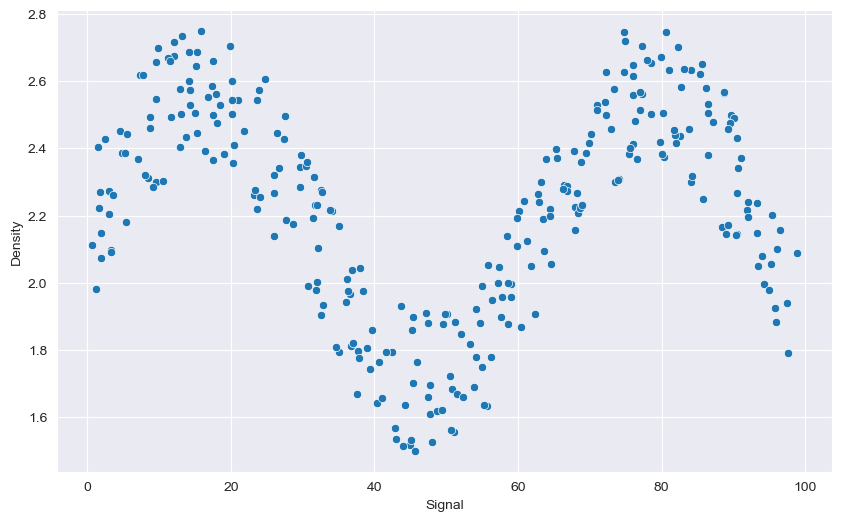

In [6]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Signal', y='Density', data=df)

In [7]:
X = df['Signal'].values.reshape(-1,1)
y = df['Density']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lr_model = LinearRegression()

In [12]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [13]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [14]:
lr_preds = lr_model.predict(X_test)

In [15]:
from sklearn.metrics import mean_squared_error

In [16]:
np.sqrt(mean_squared_error(y_test,lr_preds))

0.2570051996584629

In [17]:
signal_range = np.arange(0,100)

In [18]:
lr_output = lr_model.predict(signal_range.reshape(-1,1))

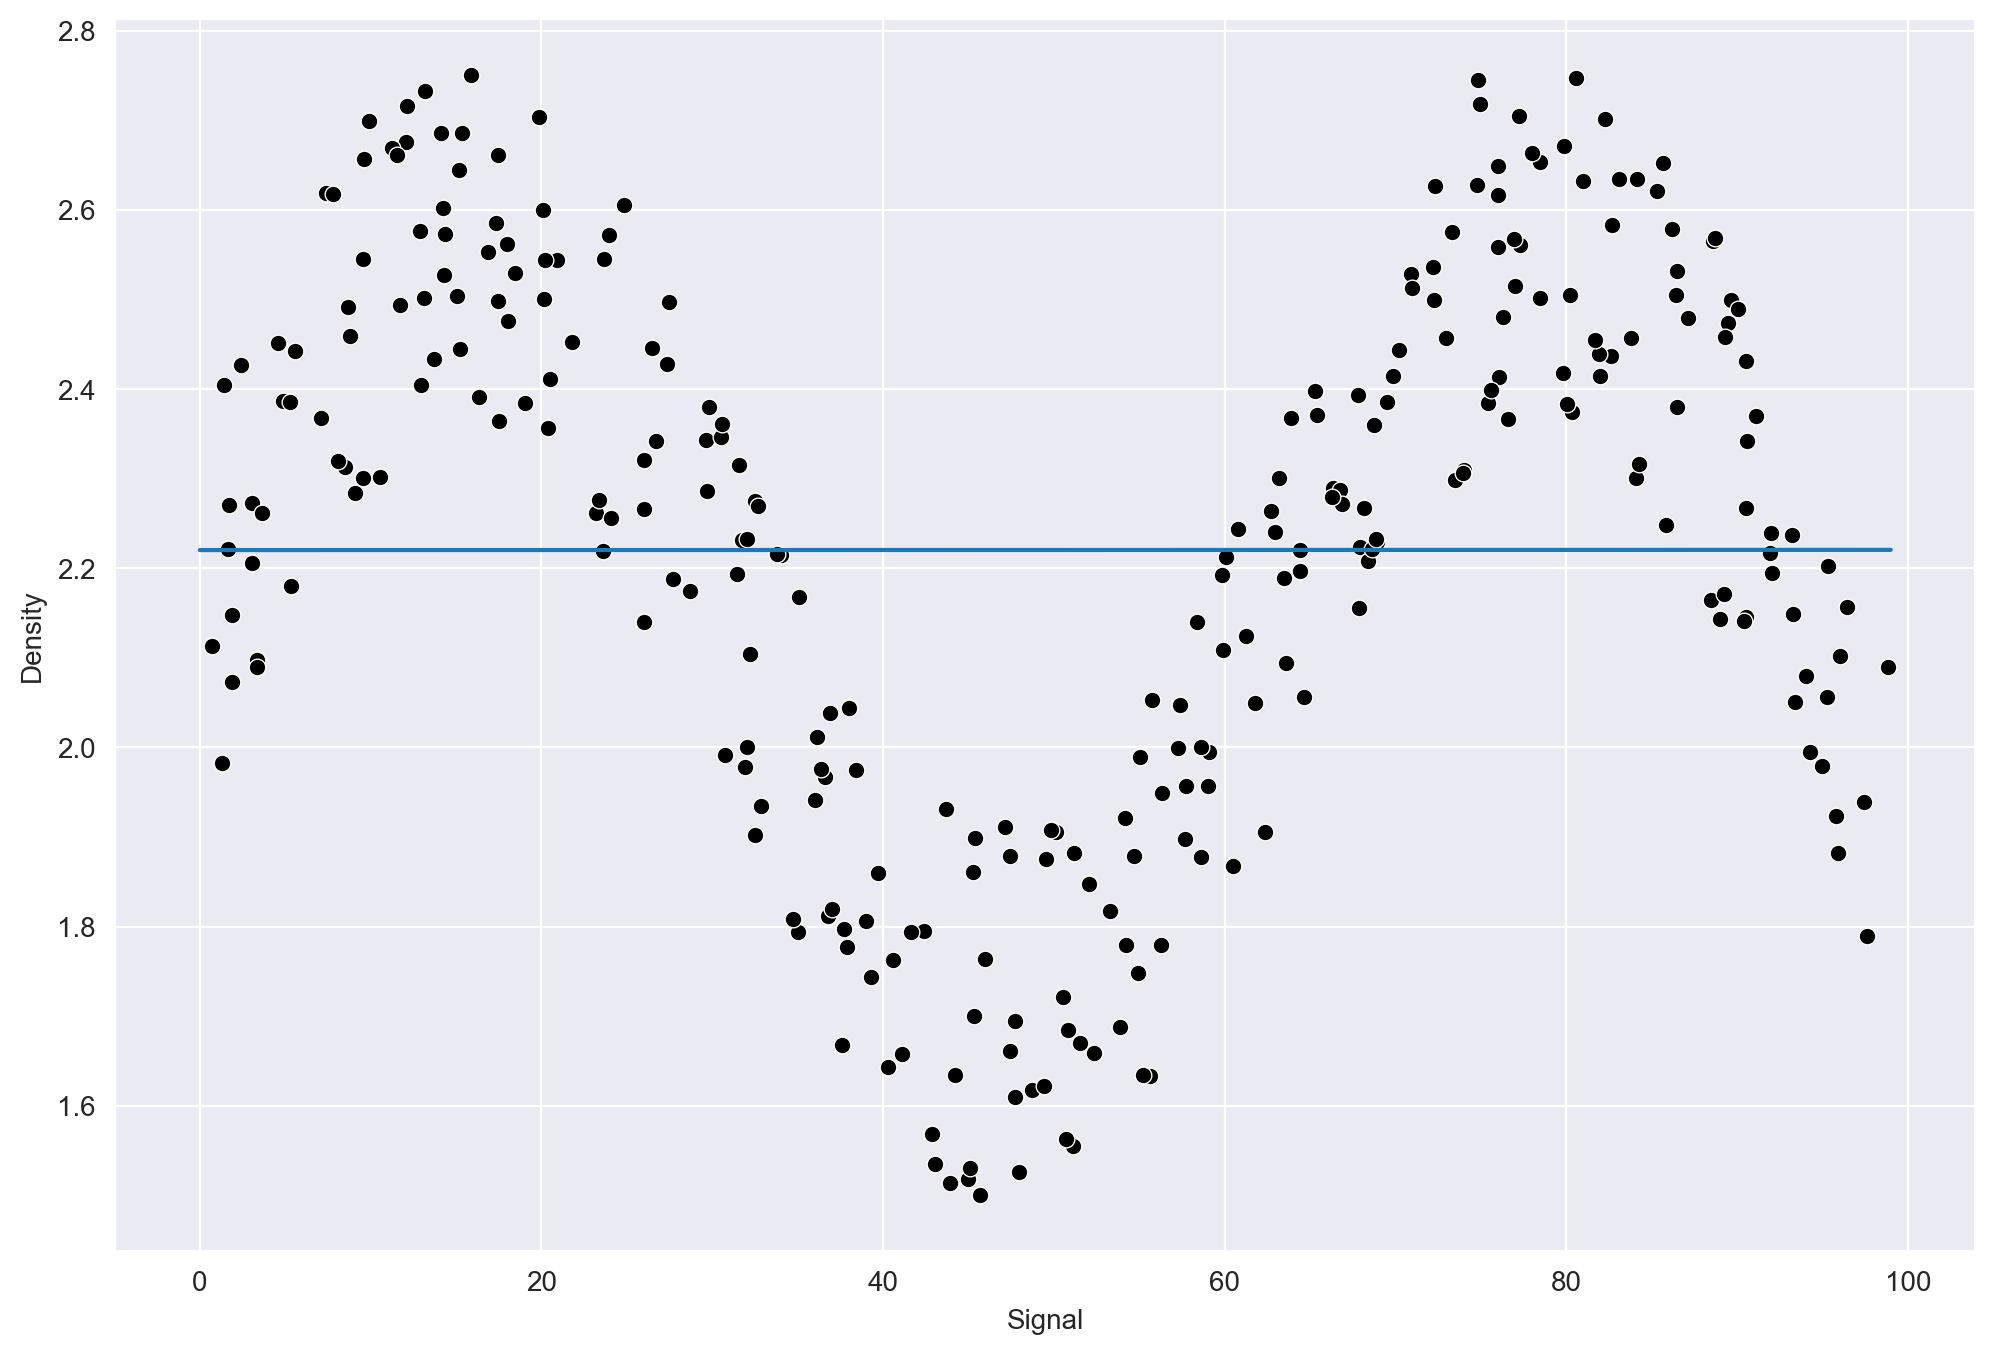

In [19]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x='Signal',y='Density',data=df,color='black')
plt.plot(signal_range,lr_output)

In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [25]:
def run_model(model, X_train, y_train, X_test, y_test):

    model.fit(X_train, y_train)

    preds = model.predict(X_test)

    RMSE = np.sqrt(mean_squared_error(y_test, preds))
    print(f'RMSE: {RMSE}')

    signal_range = np.arange(0, 100)
    output = model.predict(signal_range.reshape(-1, 1))

    plt.figure(figsize=(12,6),dpi=150)
    sns.scatterplot(x='Signal',y='Density',data=df,color='black')
    plt.plot(signal_range,output)

RMSE: 0.2570051996584629


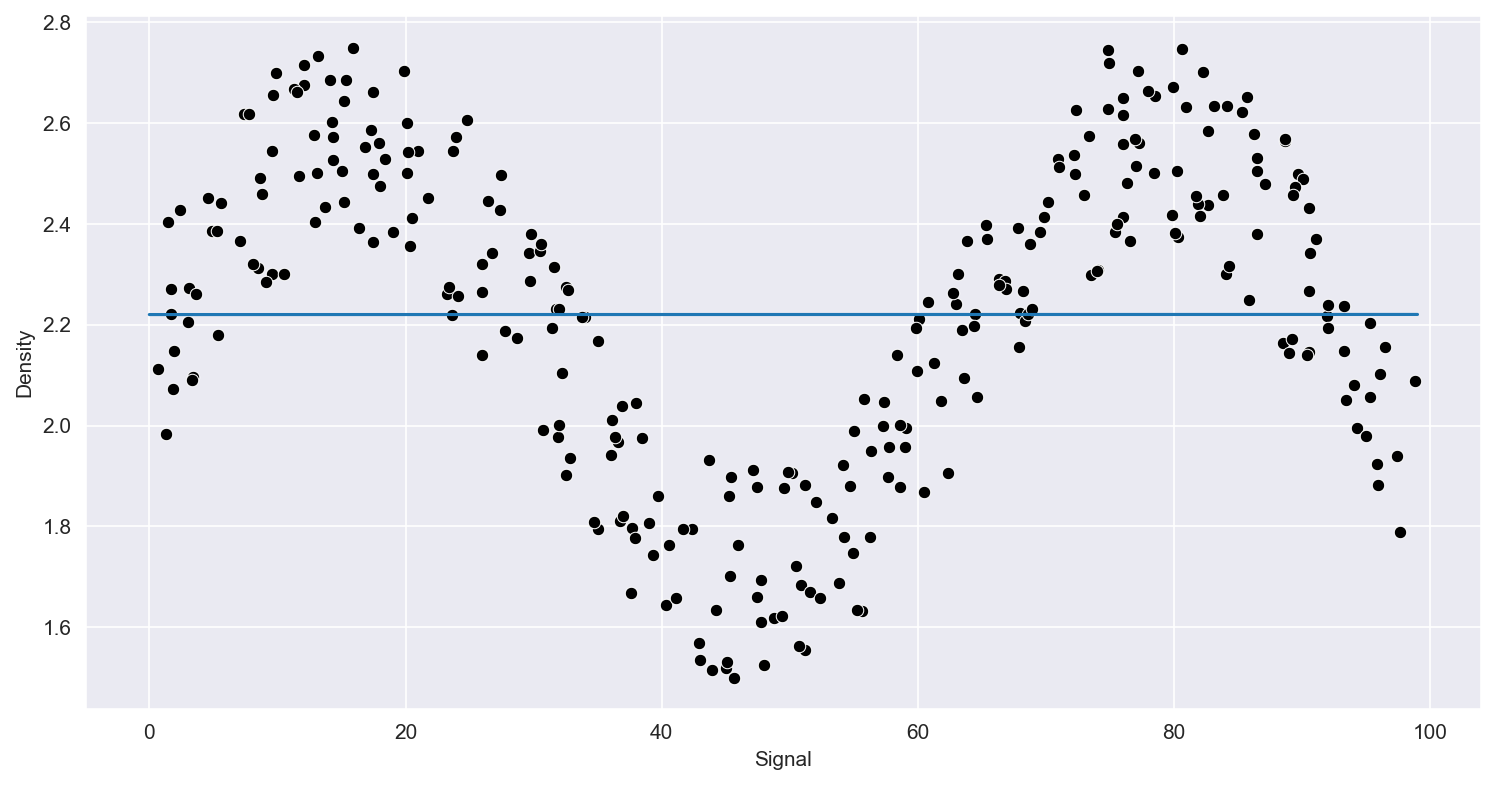

In [26]:
run_model(model,X_train,y_train,X_test,y_test)

In [27]:
from sklearn.pipeline import make_pipeline

In [28]:
from sklearn.preprocessing import PolynomialFeatures

In [29]:
pipe = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

RMSE: 0.2817309563725596


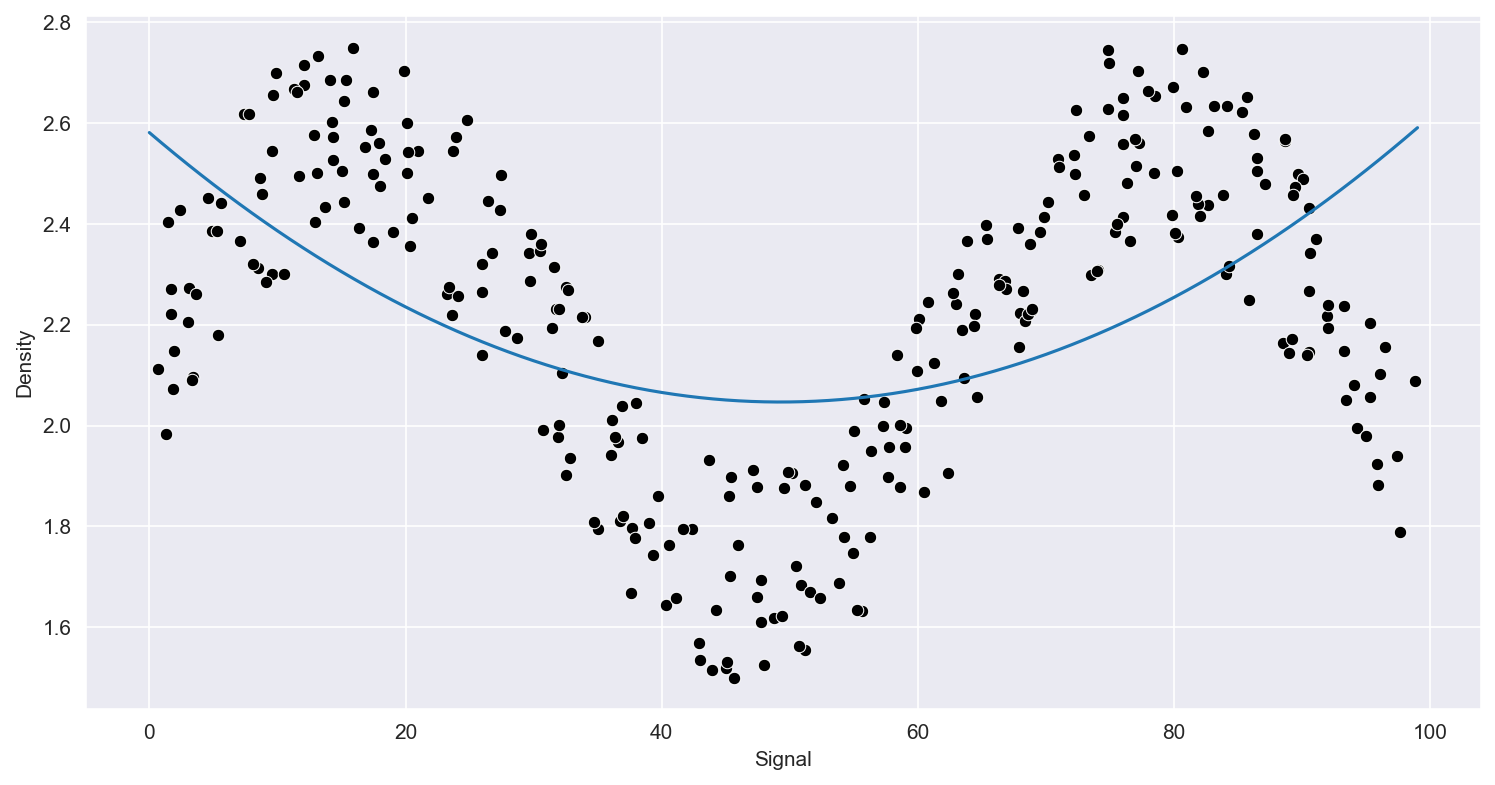

In [31]:
run_model(pipe, X_train, y_train, X_test, y_test)

In [32]:
pipe = make_pipeline(PolynomialFeatures(degree=10), LinearRegression())

RMSE: 0.14011815618437704


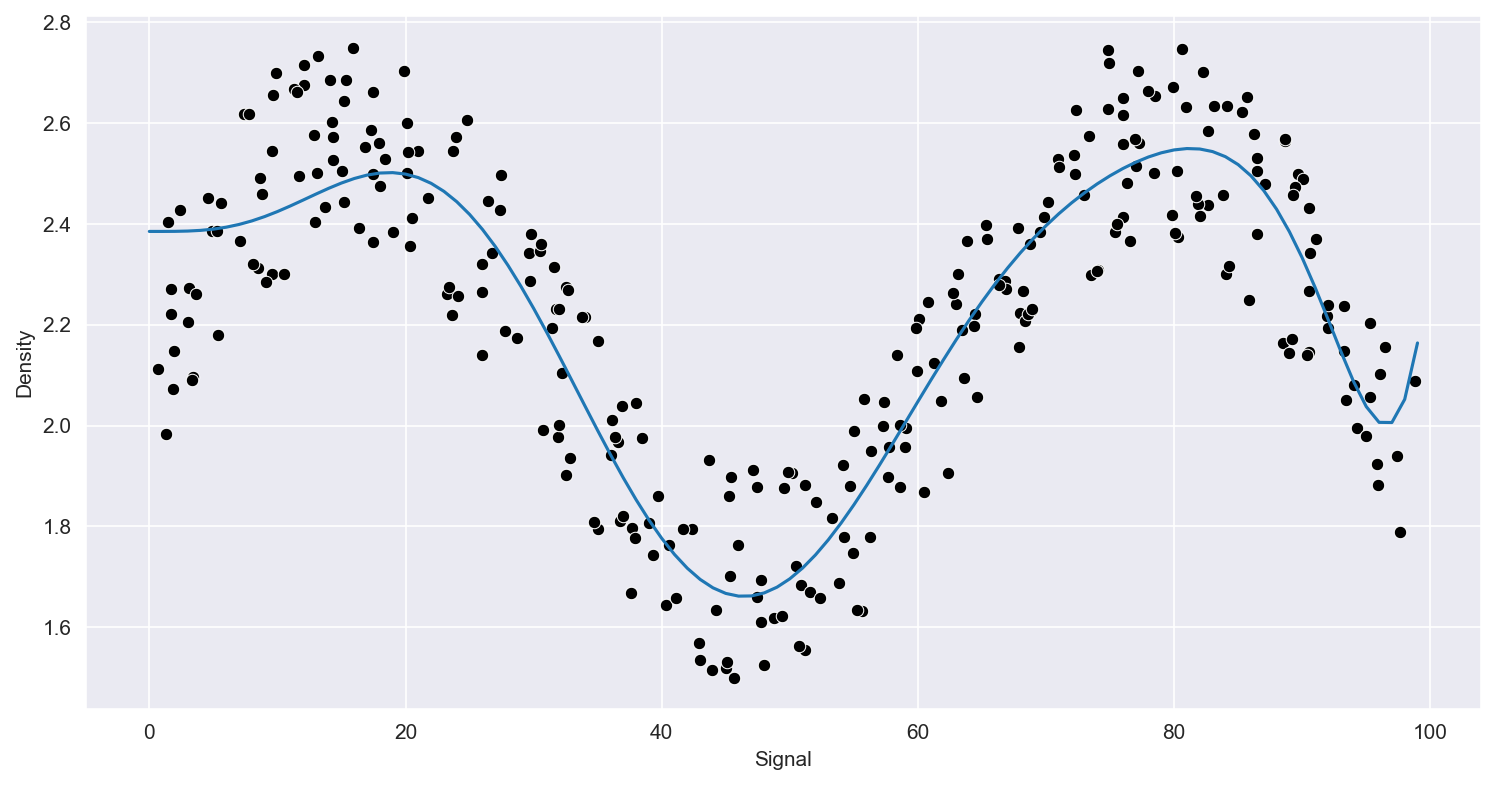

In [33]:
run_model(pipe, X_train, y_train, X_test, y_test)

In [34]:
from sklearn.neighbors import KNeighborsRegressor

RMSE: 0.1523487028635337
RMSE: 0.13730685016923647
RMSE: 0.13277855732740926


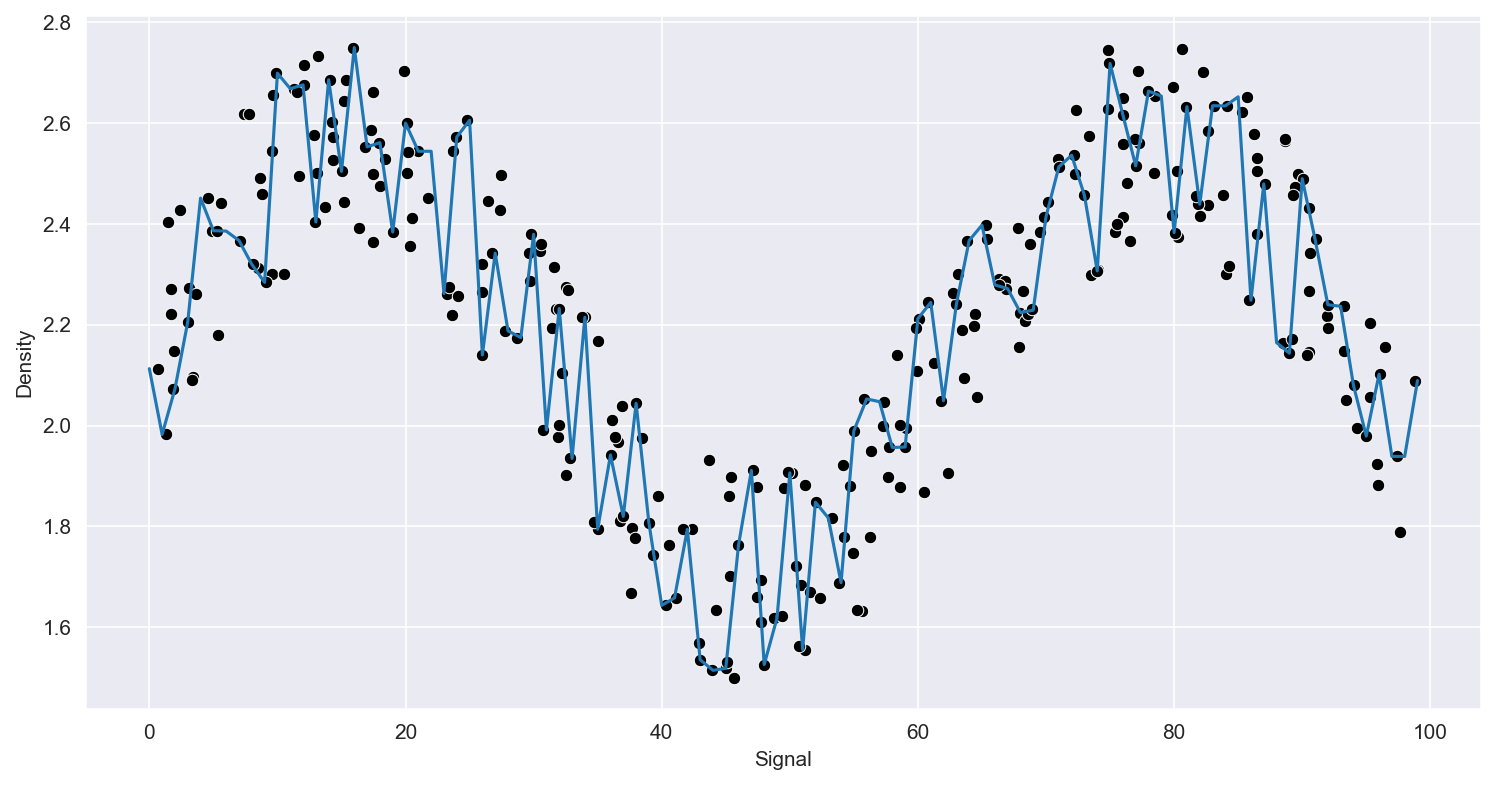

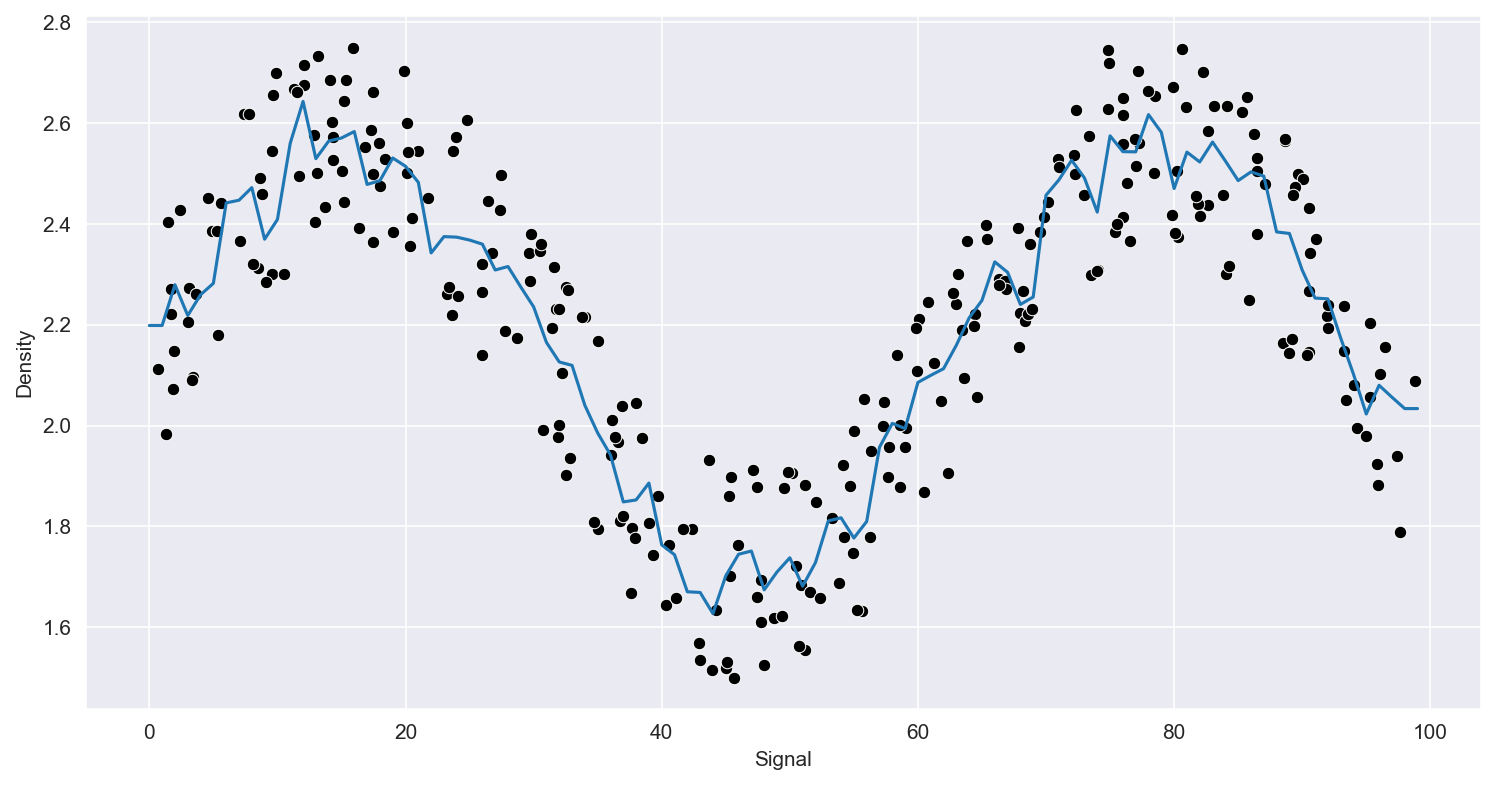

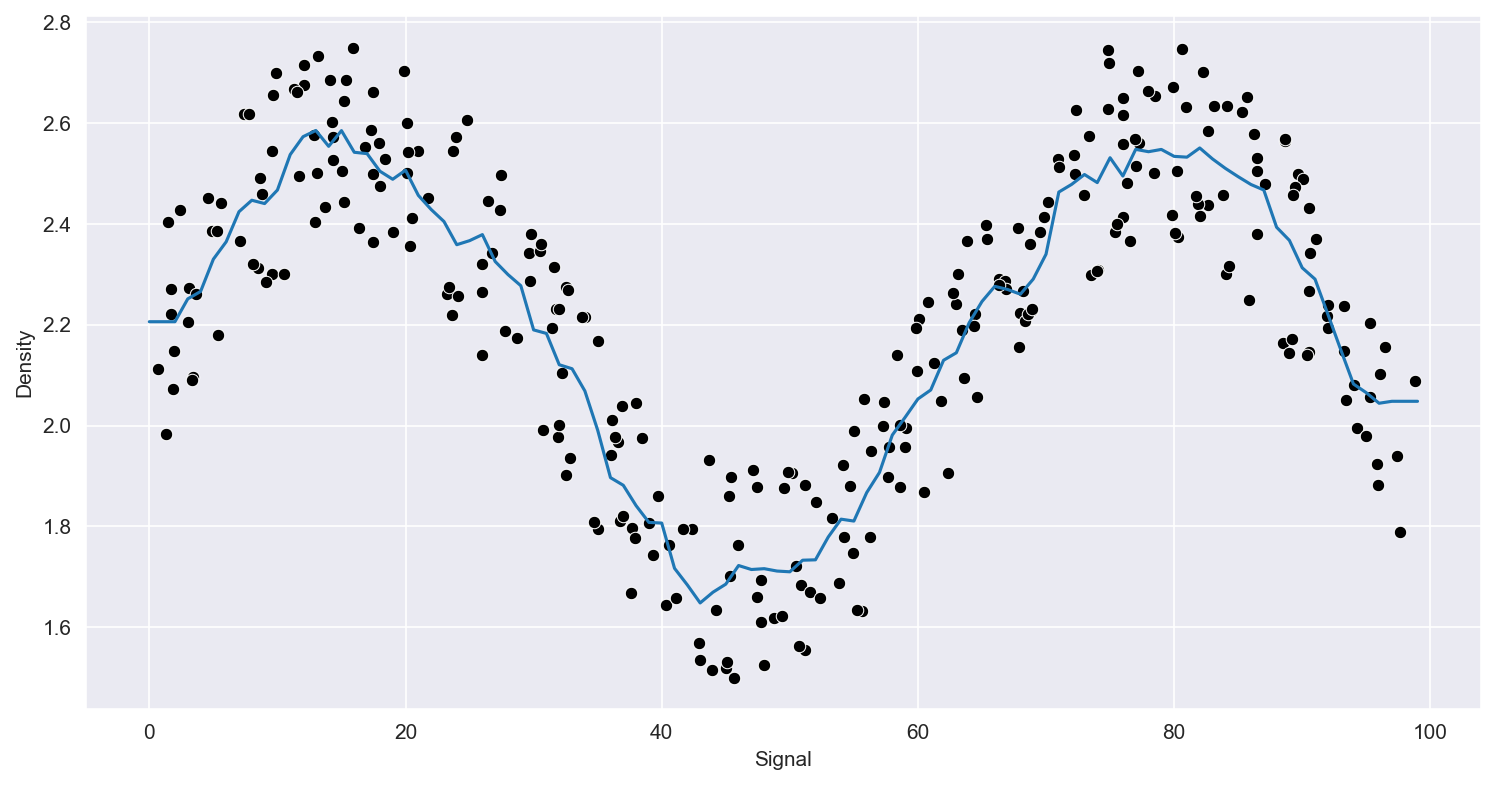

In [37]:
preds = {}
k_values = [1,5,10]
for n in k_values:

    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model,X_train,y_train,X_test,y_test)

In [38]:
from sklearn.tree import DecisionTreeRegressor

RMSE: 0.1523487028635337


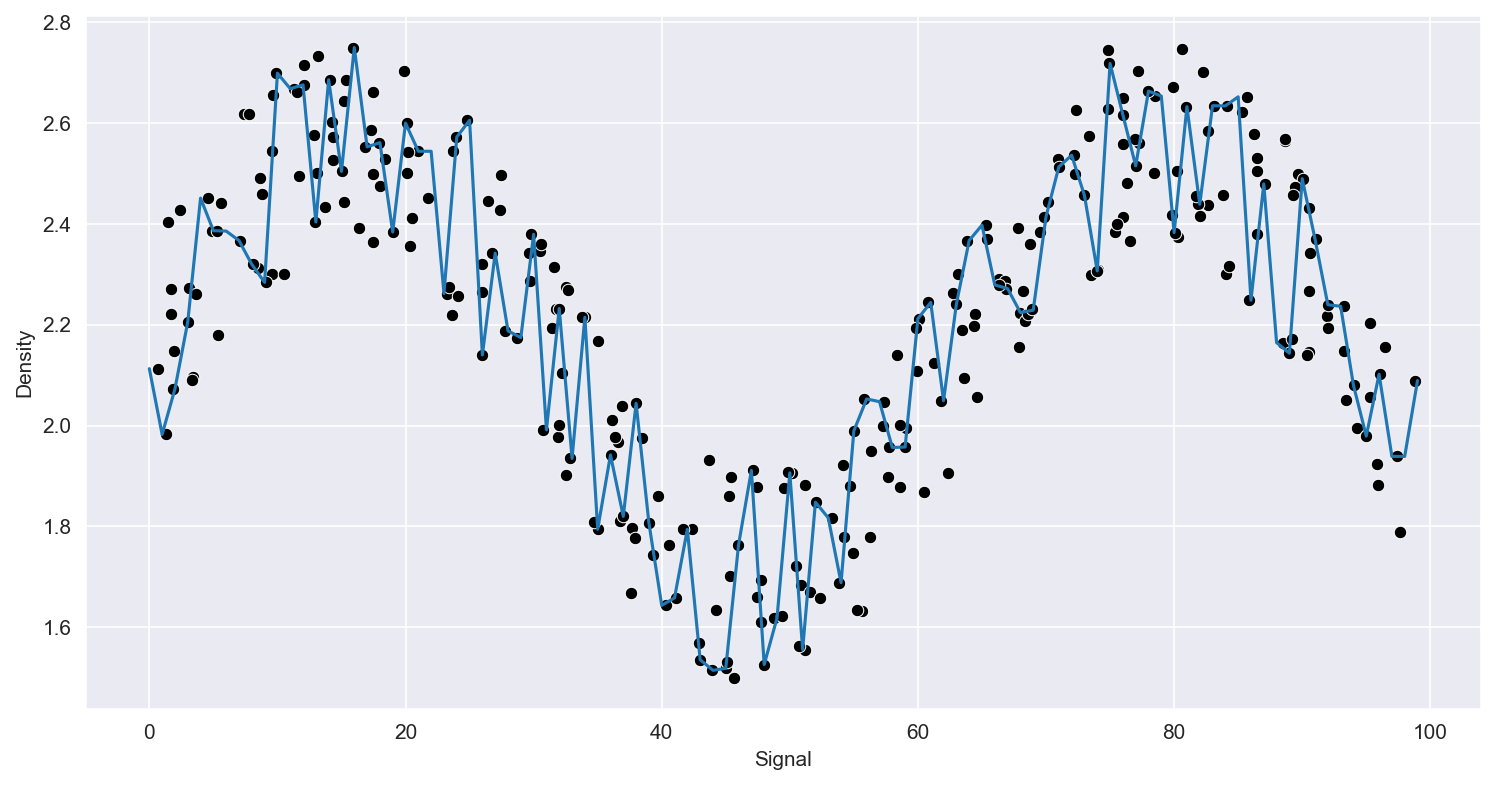

In [40]:
model = DecisionTreeRegressor()
run_model(model, X_train, y_train, X_test, y_test)

In [41]:
model.get_n_leaves()

270

In [42]:
from sklearn.svm import SVR

In [43]:
from sklearn.model_selection import GridSearchCV

In [53]:
param_grid = {
    'C': [0.001,0.01,0.1,1,5,10,25,50,100,250,500,750,800,900,1000],
    'gamma':['auto','scale']
}

In [54]:
svr = SVR()

In [55]:
grid = GridSearchCV(svr,param_grid)

RMSE: 0.12678043705190253


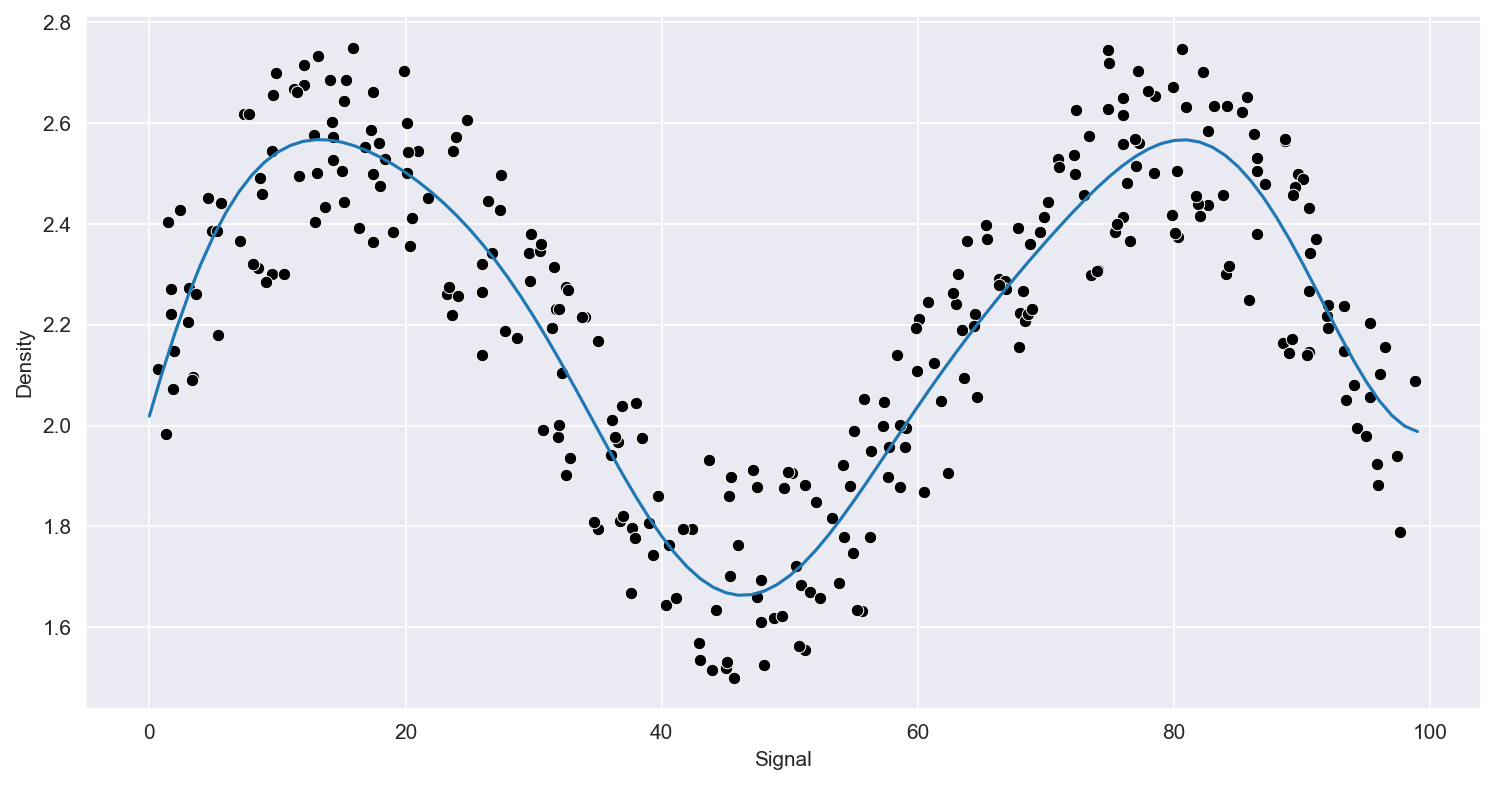

In [56]:
run_model(grid,X_train,y_train,X_test,y_test)

In [57]:
grid.best_estimator_

SVR(C=500)

In [58]:
from sklearn.ensemble import RandomForestRegressor

RMSE: 0.14280937147883882
RMSE: 0.13212985948979666
RMSE: 0.13256586876285992
RMSE: 0.13377567738552132
RMSE: 0.1374490020376906


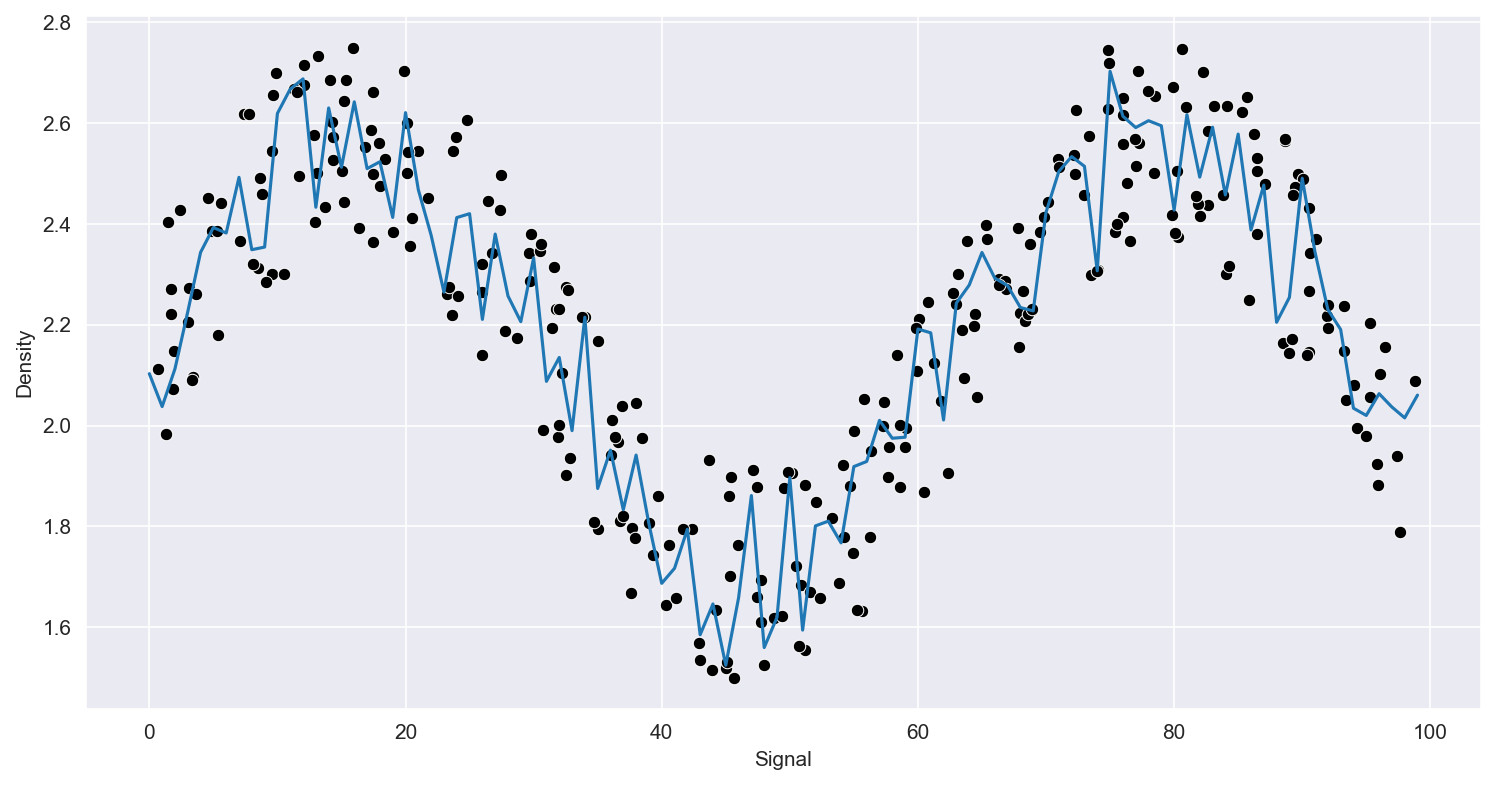

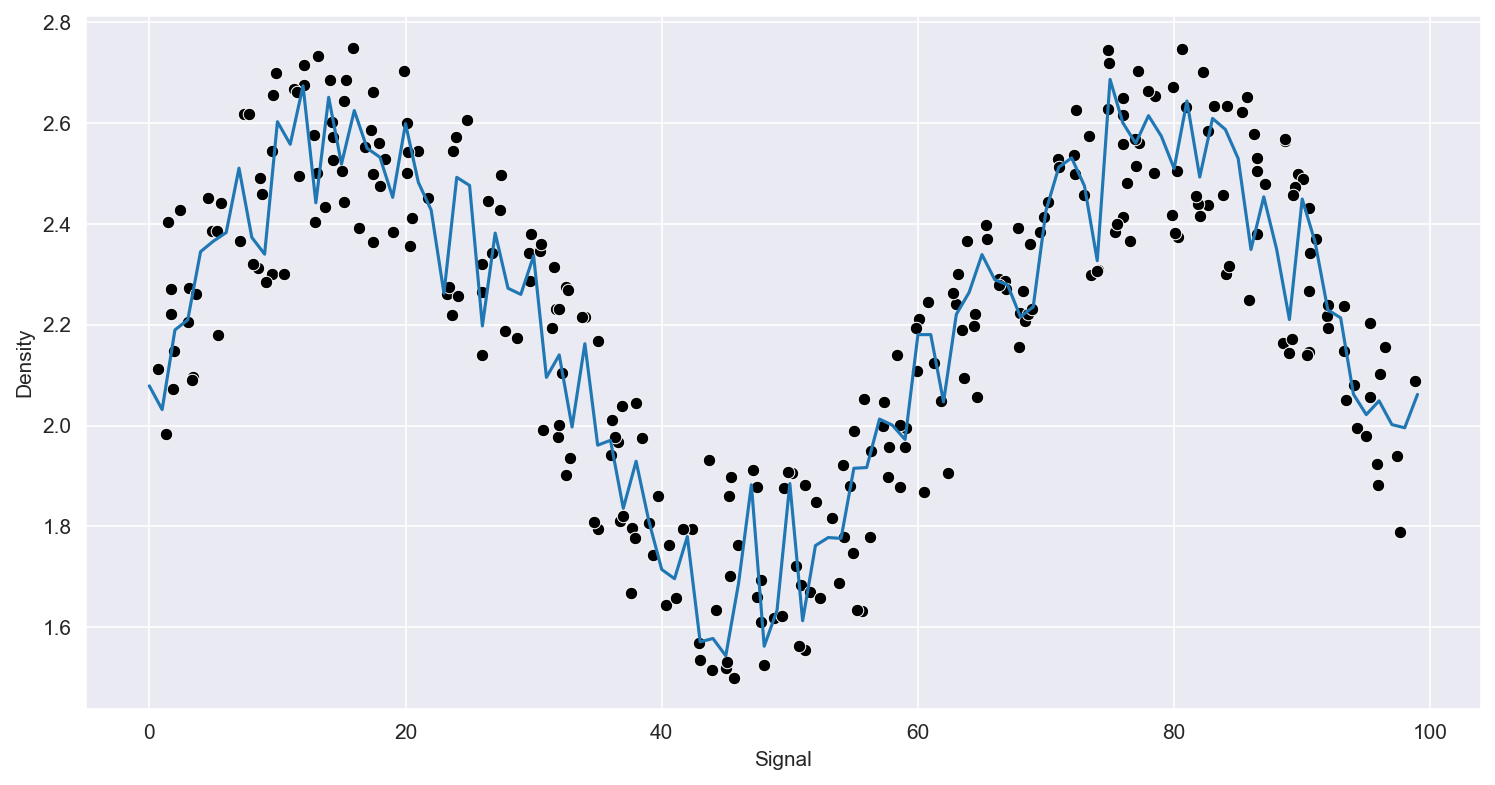

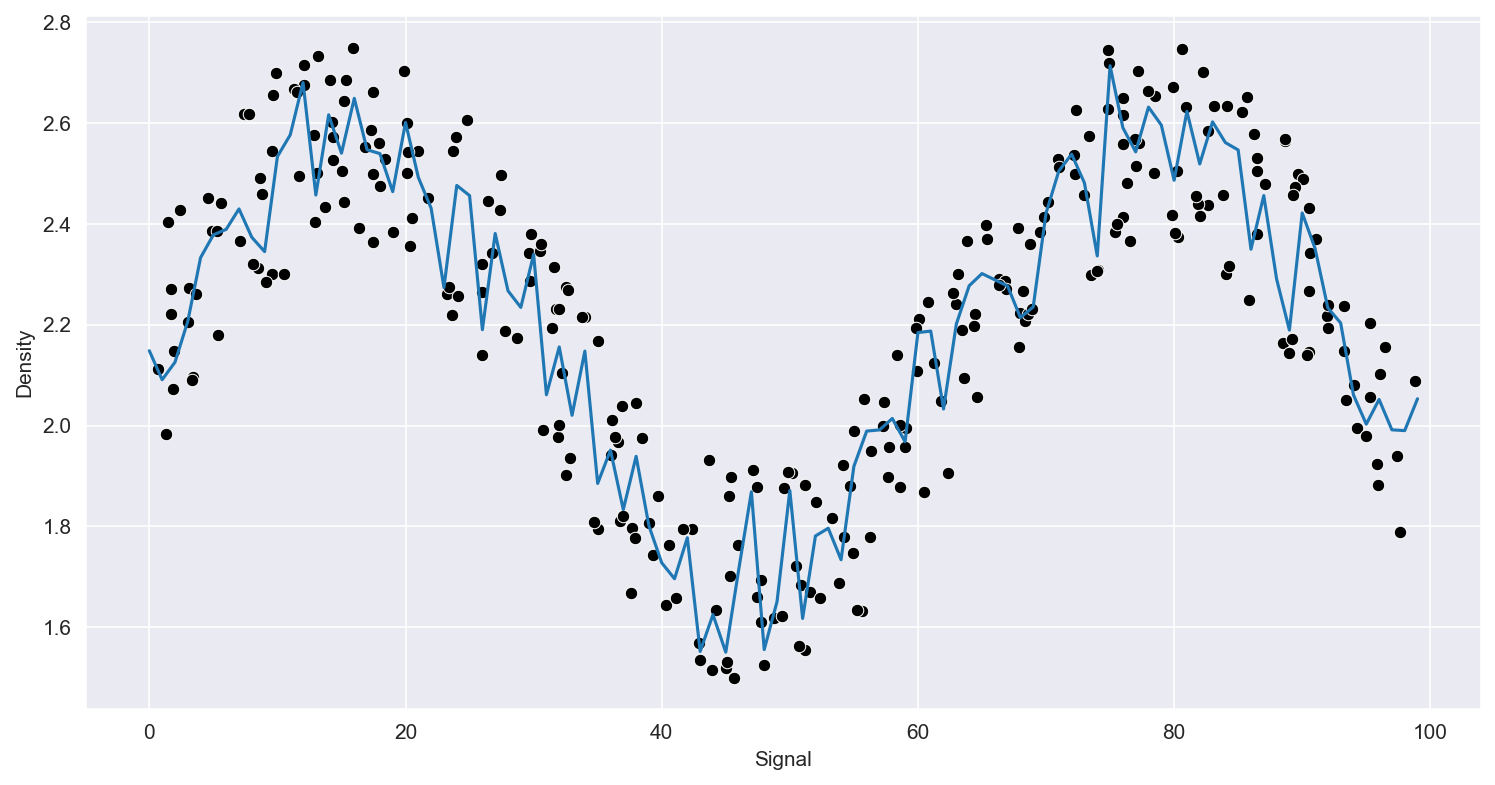

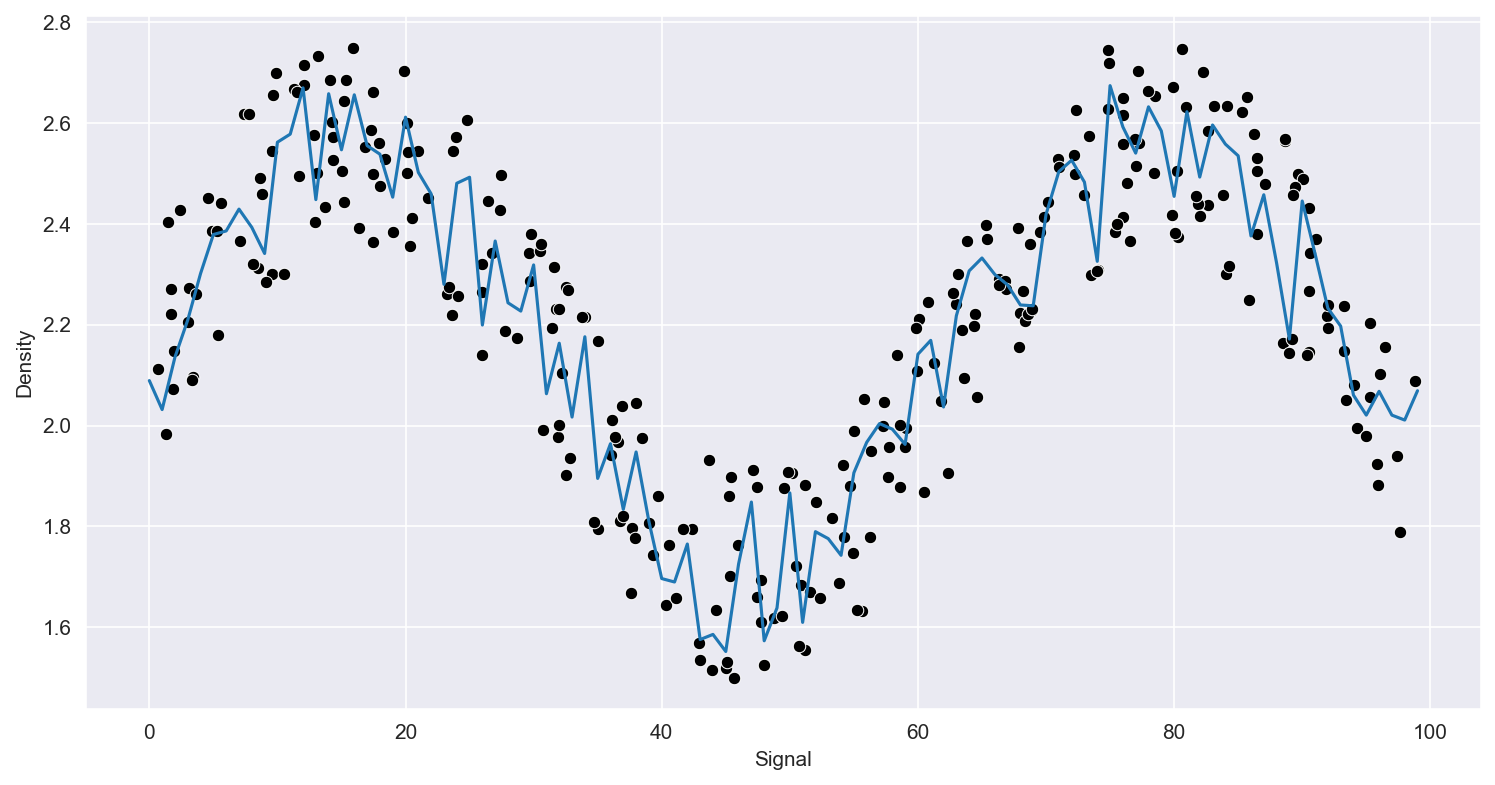

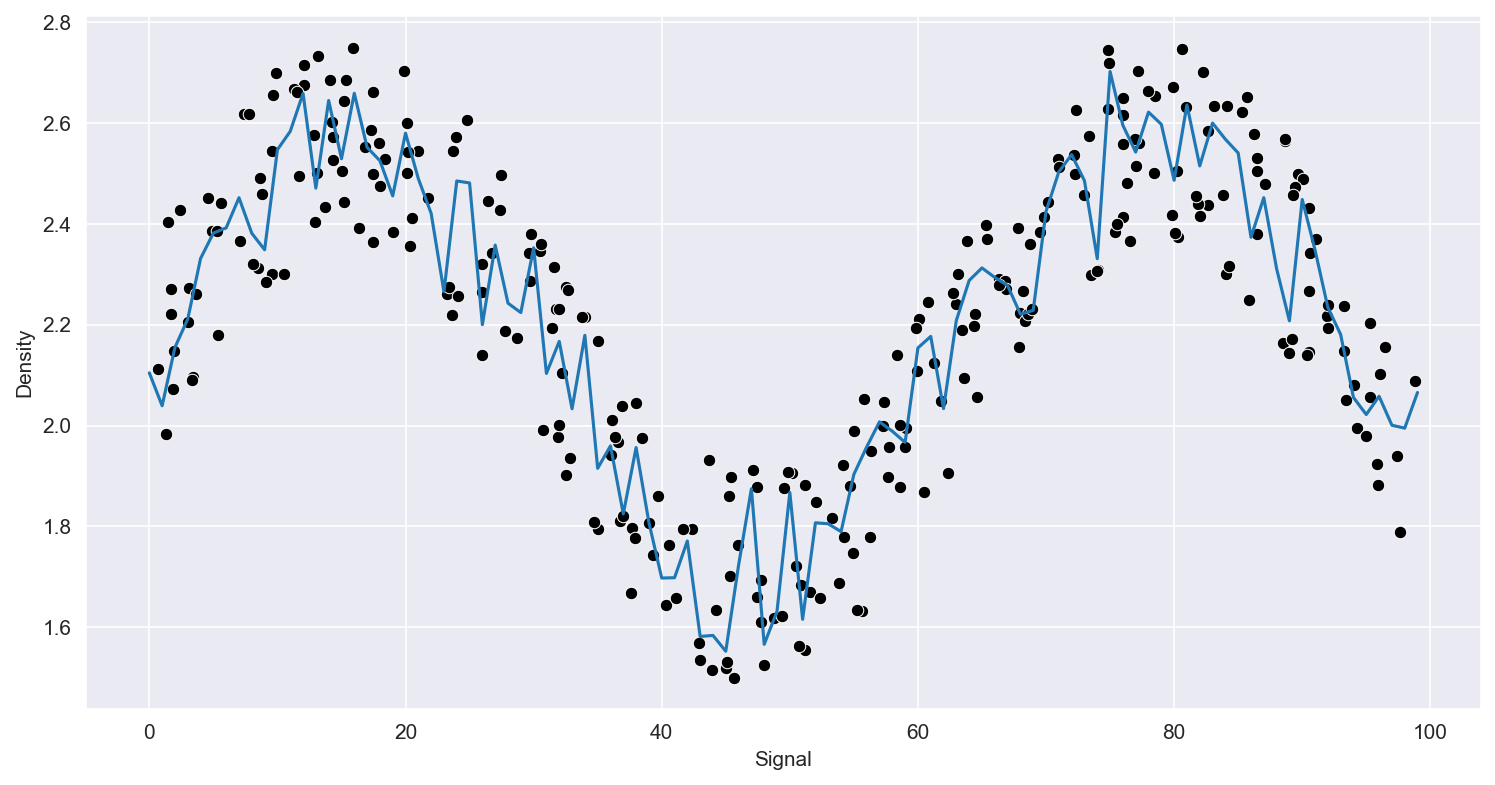

In [59]:
trees = [10,25,50,75,100]
for n in trees:

    model = RandomForestRegressor(n_estimators=n)

    run_model(model,X_train,y_train,X_test,y_test)

In [60]:
from sklearn.ensemble import GradientBoostingRegressor

RMSE: 0.13294148649584667


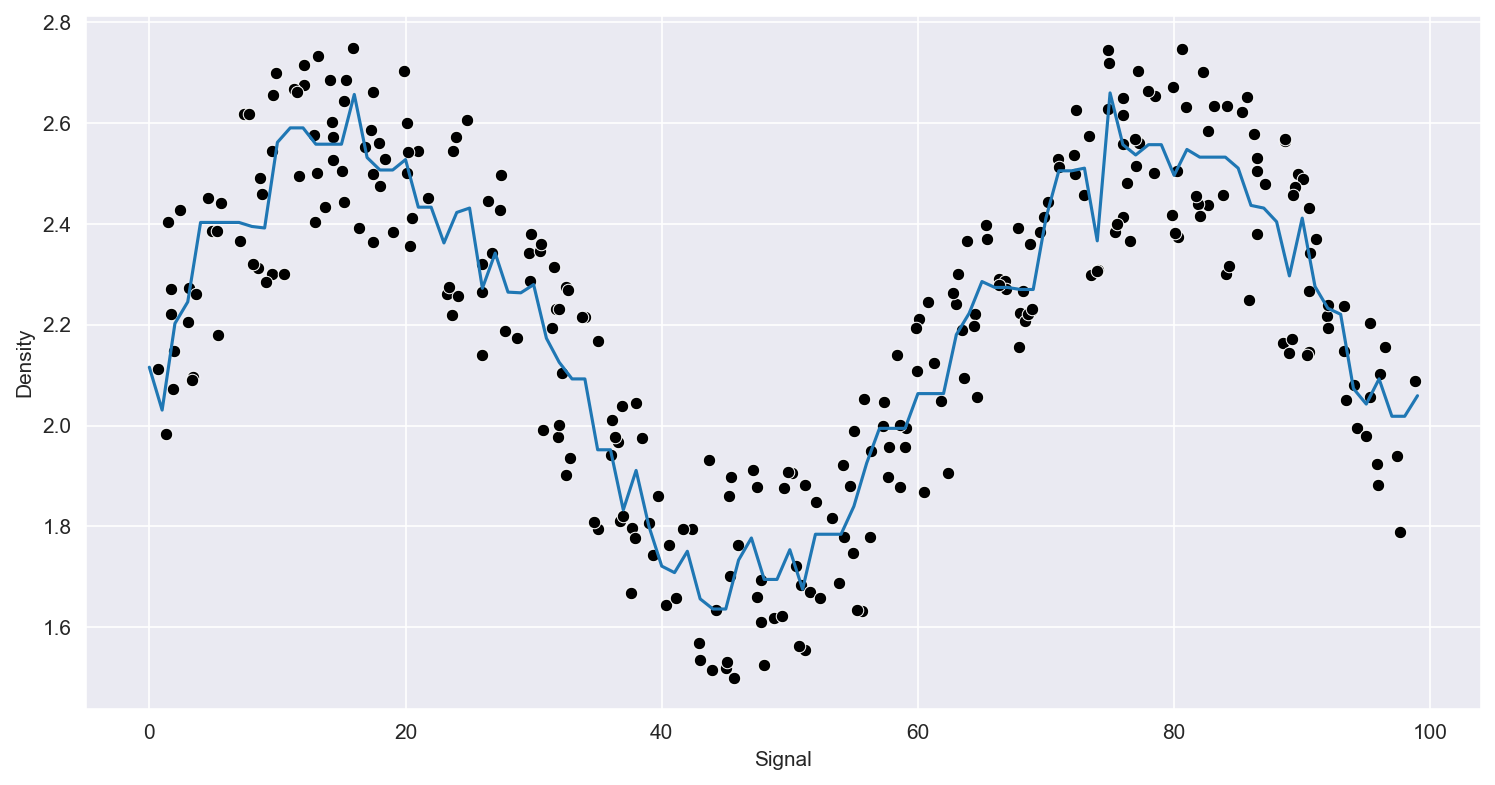

In [61]:
model = GradientBoostingRegressor()

run_model(model,X_train,y_train,X_test,y_test)

In [62]:
from sklearn.ensemble import AdaBoostRegressor

RMSE: 0.13294148649584667


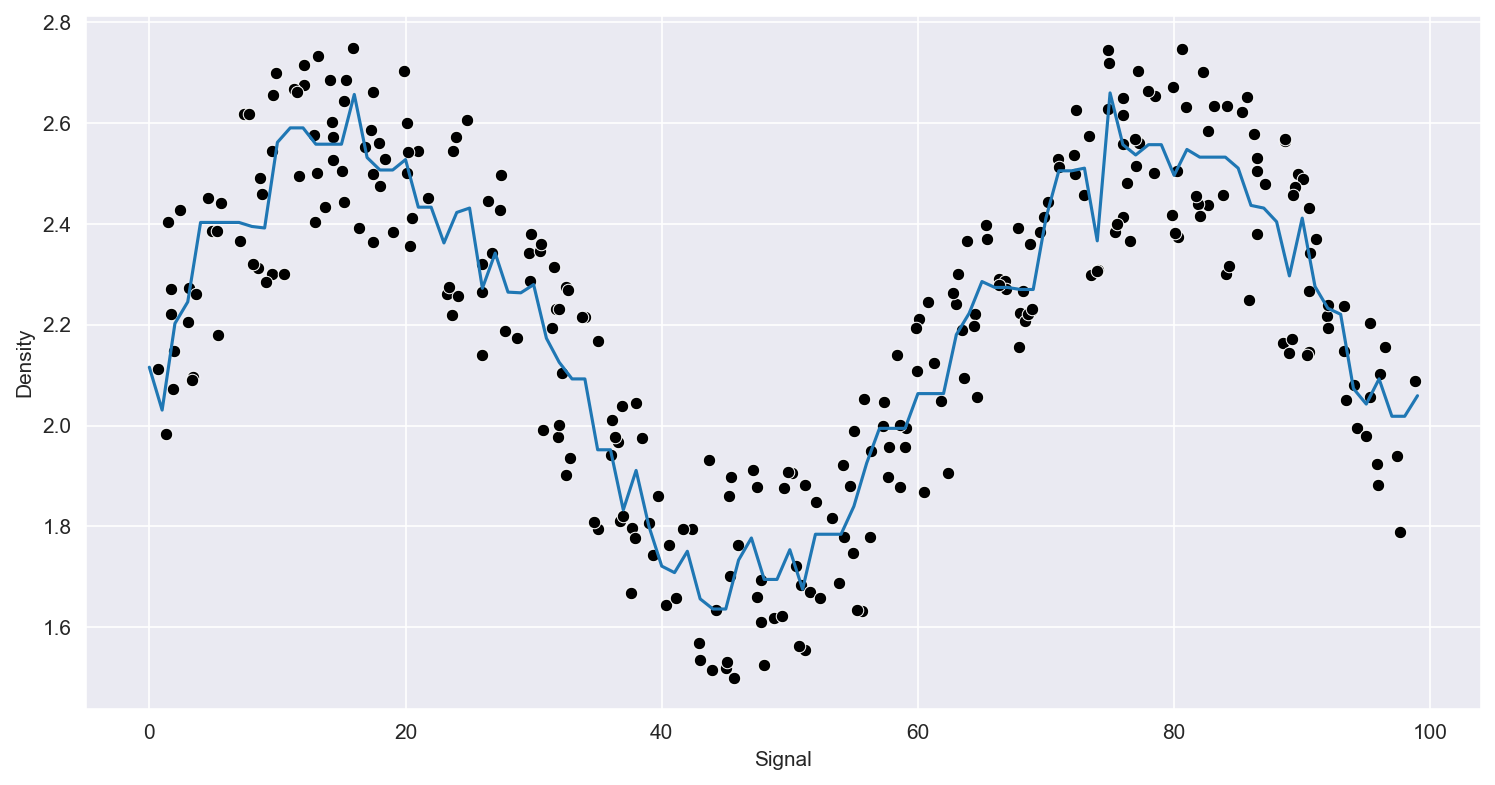

In [63]:
model = GradientBoostingRegressor()

run_model(model,X_train,y_train,X_test,y_test)